In [1]:
import csv
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.metrics import mean_squared_error

In [2]:
data_AVR = pd.read_csv("ECG_2_AVR.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    data_AVR.to_csv("file_name.csv", sep='\t', encoding='utf-8')
    
data_II = pd.read_csv("ECG_2_II.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    data_II.to_csv("file_name.csv", sep='\t', encoding='utf-8')    
    
data_II_missing = pd.read_csv("ECG_2_II_missing.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    data_II_missing.to_csv("file_name.csv", sep='\t', encoding='utf-8')
    
data_V = pd.read_csv("ECG_2_V.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    data_V.to_csv("file_name.csv", sep='\t', encoding='utf-8')
    
data_II_complete = np.concatenate([data_II, data_II_missing])  

In [3]:
train_feature_I = data_AVR.head(-3750)       #train_feature_I.size   71249
train_feature_II = data_V.head(-3750)        #train_feature_II.size  71249
train_label = data_II                        #train_label.size       71249

test_feature_I = data_AVR.tail(3749)         #test_feature_I.size    3749
test_feature_II = data_V.tail(3749)          #test_feature_II.size   3749
test_label =  data_II_missing                #test_label.size        3749

train_feature_I = np.array(train_feature_I)
train_feature_II = np.array(train_feature_II)
train_label = np.array(train_label)

test_feature_I = np.array(test_feature_I)
test_feature_II = np.array(test_feature_II)
test_label = np.array(test_label)

class_names = ['feature_I', 'feature_II', 'label']

In [4]:
all_data = np.c_[train_feature_I, train_feature_II, train_label]
all_data_display = pd.DataFrame(data=all_data, columns=class_names)

In [5]:
# test features
my_test_features = np.c_[test_feature_I,test_feature_II]
class_names = ['feature_I', 'feature_II']
df_test_features = pd.DataFrame(data=my_test_features, columns=class_names)

# test label
my_test_label = np.c_[test_label]
class_names = ['label']
df_test_label = pd.DataFrame(data=my_test_label, columns=class_names)

# train label
my_train_label = np.c_[train_label]
class_names = ['label']
df_train_label = pd.DataFrame(data=my_train_label, columns=class_names)

# train features
my_train_features = np.c_[train_feature_I,train_feature_II]
class_names = ['feature_I', 'feature_II']
df_train_features = pd.DataFrame(data=my_train_features, columns=class_names)

In [6]:
df_train_features.shape

(71249, 2)

In [46]:
def build_model():
  model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=(0,2)),
    layers.Dense(12, activation='relu'),
    layers.Dense(12, activation='relu'),
    layers.Dense(1)
  ])

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [47]:
model = build_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 0, 12)             36        
_________________________________________________________________
dense_21 (Dense)             (None, 0, 12)             156       
_________________________________________________________________
dense_22 (Dense)             (None, 0, 12)             156       
_________________________________________________________________
dense_23 (Dense)             (None, 0, 1)              13        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [48]:
EPOCHS = 1500

history = model.fit(
  my_train_features, my_train_label,
  epochs=EPOCHS, validation_split = 0.001, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0017,  mae:0.0170,  mse:0.0017,  val_loss:0.0001,  val_mae:0.0071,  val_mse:0.0001,  
....................................................................................................
Epoch: 100, loss:0.0001,  mae:0.0078,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0076,  val_mse:0.0001,  
....................................................................................................
Epoch: 200, loss:0.0001,  mae:0.0075,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0082,  val_mse:0.0001,  
....................................................................................................
Epoch: 300, loss:0.0001,  mae:0.0074,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0081,  val_mse:0.0001,  
....................................................................................................
Epoch: 400, loss:0.0001,  mae:0.0074,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0086,  val_mse:0.0001,  
........................................................................

In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1495,0.000117,0.007298,0.000117,0.000103,0.007121,0.000103,1495
1496,0.000116,0.007279,0.000116,0.000086,0.007044,0.000086,1496
1497,0.000116,0.007262,0.000116,0.000080,0.006861,0.000080,1497
1498,0.000115,0.007274,0.000115,0.000098,0.007845,0.000098,1498
1499,0.000117,0.007293,0.000117,0.000073,0.006756,0.000073,1499


Text(0, 0.5, 'MSE')

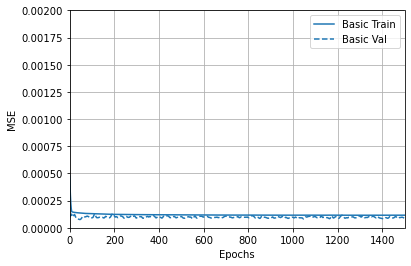

In [122]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.002])
plt.ylabel('MSE')

In [51]:
test_predictions = model.predict(my_test_features).flatten()

print(test_predictions)


[0.18060637 0.18060637 0.17519683 ... 0.17216776 0.2178693  0.1974812 ]


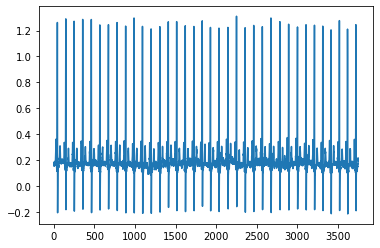

In [52]:
plt.plot(test_predictions)

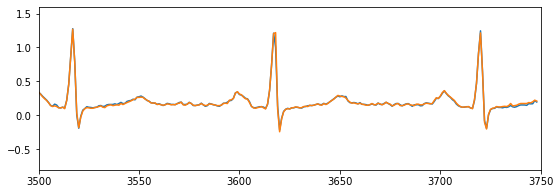

In [137]:
plt.figure(figsize=(9, 3)) #(35,12)
plt.ylim([-0.8, 1.6])
plt.xlim([3500, 3750])
plt.plot(test_predictions)
plt.plot(test_label)
plt.savefig('foo.png', bbox_inches='tight')

In [54]:
a = test_predictions
np.savetxt("d12d12d12.csv", a, delimiter=",")

In [130]:
mse = mean_squared_error(test_predictions,test_label)
print(mse)

0.00011491396576341232
